**PROBLEM STATEMENT**

Aim to develop a machine learning model that accurately estimates the price of different car models based on a wide range of attributes and features.

**IMPORT LIBRARIES AND LOAD DATASET**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor



In [2]:
df = pd.read_csv('/content/CarPrice_prediction1.csv') # load the data


**BASIC DATA INFORMATION AND DATA CLEANING**

In [3]:
df.head() # display first 5 rows of dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.tail() # dispaly last 5 rows of dataframe

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
df.shape # display total number of rows and columns

(205, 26)

In [7]:
df.describe() # descriptive statistics of numerical columns

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,203.000000,202.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.611330,53.745545,2555.565854,126.907317,3.329756,3.254927,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,5.099924,2.455050,520.680204,41.642693,0.270844,0.313292,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,0.000000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.150000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.info()#display column information such as column name,data type, non_null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          203 non-null    float64
 12  carheight         202 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.dtypes # display the column and its data type

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [10]:
df.isnull().sum()# count number of missing values in each column

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            2
carheight           3
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

when checking null values in the dataset , it is observed that there are null values in the columns 'carwidth' and 'carheight'.

Number of null values in 'carwidth':2

Number of null values in 'carheight':3

In [11]:
# Fixing null values

df['carwidth'].fillna(df['carwidth'].mean(), inplace=True)  # fill null values in the column 'carwidth' with mean
df['carheight'].fillna(df['carheight'].mean(), inplace=True) # fill null values in the column 'carheight' with mean

Here, I filled null values in these columns with mean values of respective columns.

In [12]:
df.isnull().sum() # checking null values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Now there is no null values in the dataset

In [13]:
df.duplicated().sum()# count number of duplicate rows in the dataframe

0

Here, it is observed that there is no duplicate values

In [14]:
df.nunique() # count number of unique values in each column

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             46
carheight            50
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [15]:
# check unique values in each categorical column
categorical_columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
    'cylindernumber','fuelsystem']

for col in categorical_columns:

    print(f"Category in {col} is : {df[col].unique()}")

Category in fueltype is : ['gas' 'diesel']
Category in aspiration is : ['std' 'turbo']
Category in doornumber is : ['two' 'four']
Category in carbody is : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Category in drivewheel is : ['rwd' 'fwd' '4wd']
Category in enginelocation is : ['front' 'rear']
Category in enginetype is : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Category in cylindernumber is : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Category in fuelsystem is : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


**DATA VISUALIZATION**

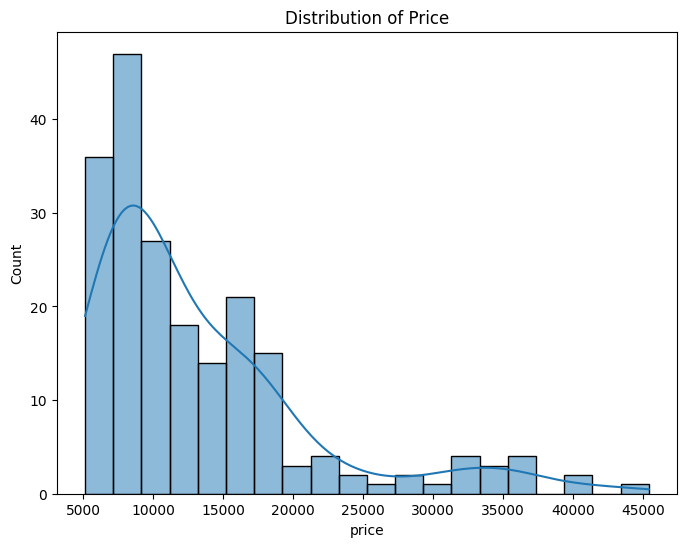

In [16]:
# histogram to show the distribution of price
plt.figure(figsize=(8, 6))
sns.histplot(data=df['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

This graph shows the frequency count of different price ranges.Here, we can see a skewed distribution, that is majority is lower price.

<ipython-input-17-65e79a16e772>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
<ipython-input-17-65e79a16e772>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
<ipython-input-17-65e79a16e772>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
<ipython-input-17-65e79a16e772>:11: FutureWarning: 

Passing `palette` without assign

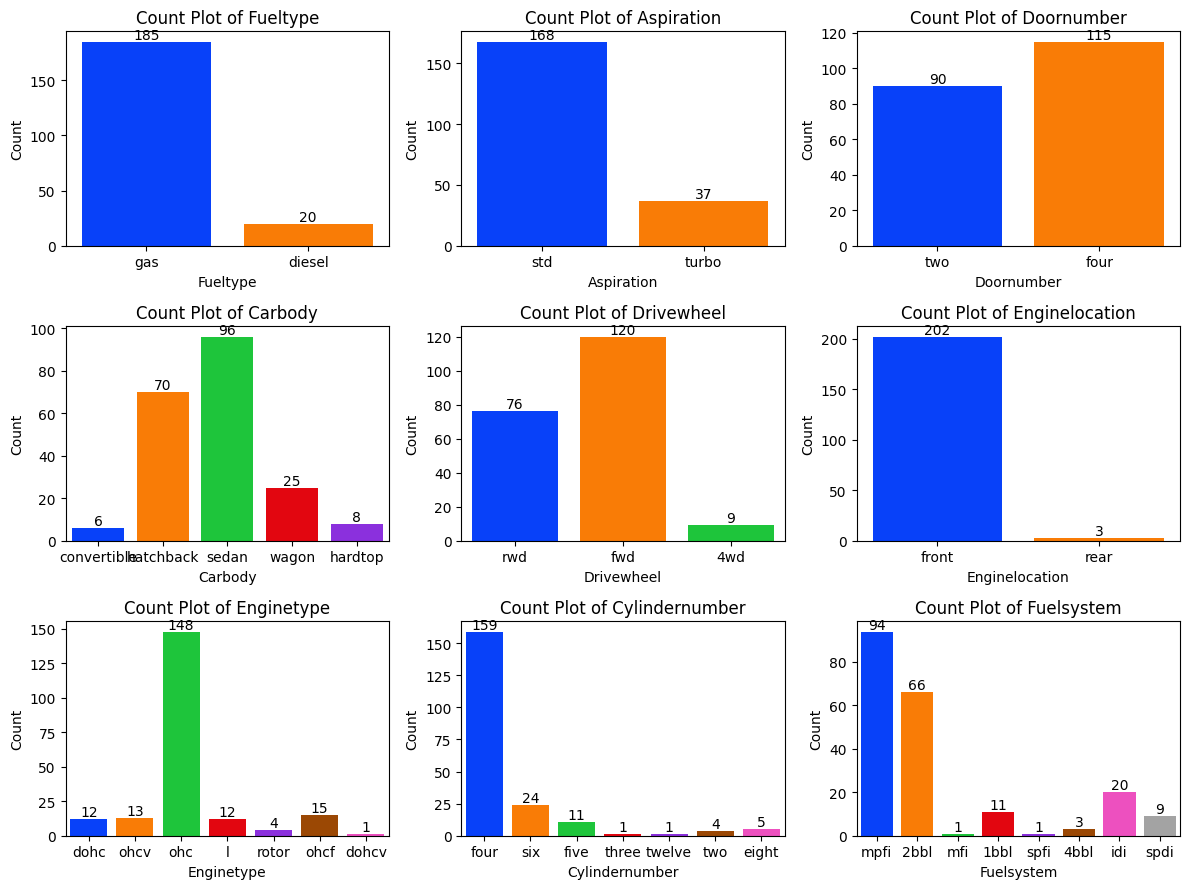

In [17]:
 #Define the list of categorical columns to analyze
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

Observations


*   In 'fueltype' ,majority cars are using gas than diesel
*   In the case of Aspiration, most of cars have standard aspiration than turbocharging.

*   Most of car have four doors than two.
*   Majority of the car have sedan bodytype and very less have convertible.

*   Majority of car wheels are fwd and manority is 4wd.
*   Engine location of most of the car are front than rear.

*   In the case of 'Enginetype' majority have ohc and very less have dohcv.
*   Majority of car have cylinder number 4 and manority is 3 and 12.

*   Majority of car have mpfi fuel system and manority are mfi and spfi.














<ipython-input-18-f8c203471b05>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_cars.values, y=top_20_cars.index, palette="viridis")# plotting barplot using seaborn


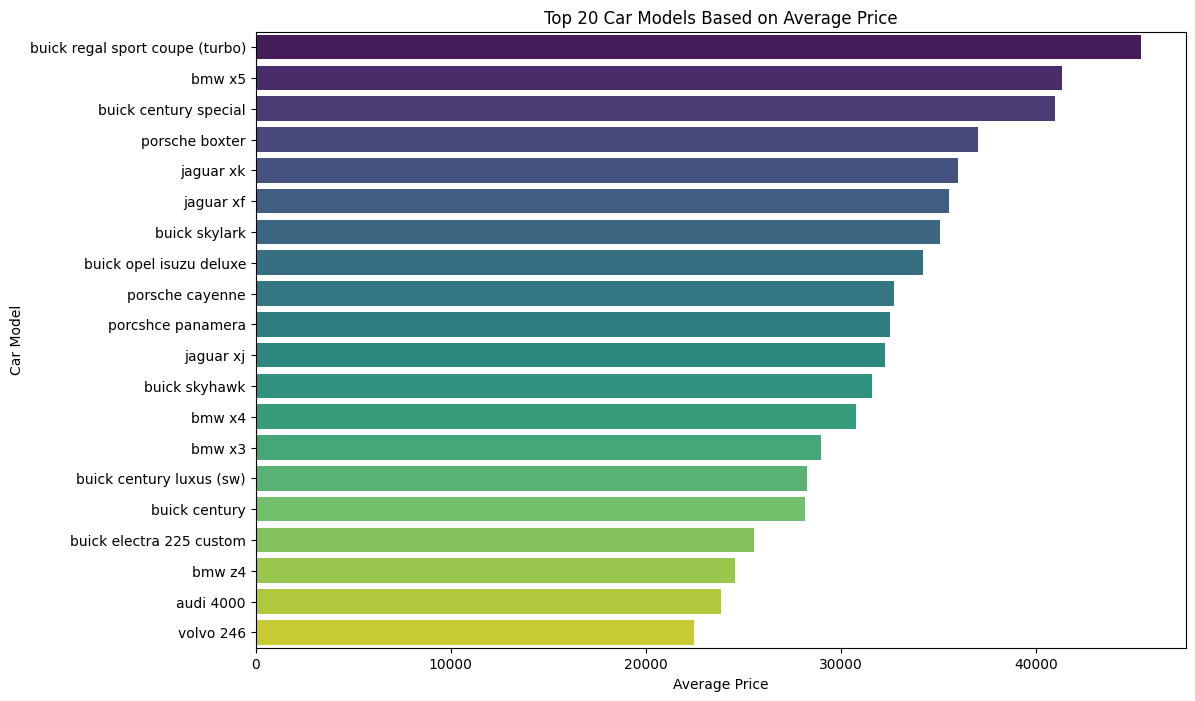

In [18]:
# BAR PLOT TO SHOW TOP 20 CAR MODEL BASED ON AVERAGE PRICE

# Calculate average price for each car model
avg_prices_by_car = df.groupby('CarName')['price'].mean().sort_values(ascending=False)

# Take the top 20 car models
top_20_cars = avg_prices_by_car.head(20)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_cars.values, y=top_20_cars.index, palette="viridis")# plotting barplot using seaborn
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.title('Top 20 Car Models Based on Average Price')
plt.show()

Observations:


*  From this graph it is observed that 'buick regalsportcoupe(turbo)'  carmodel is in first position because its average price is higher than other car models.

*  volvo 246 is last position because its average price lower than other car models.


*   bmw x5 is in second position and buick century special is in third position.
*   car models like porcshce cayenne,porcshce panamera and jaguar xj are in almost same position because its average price is in same range.






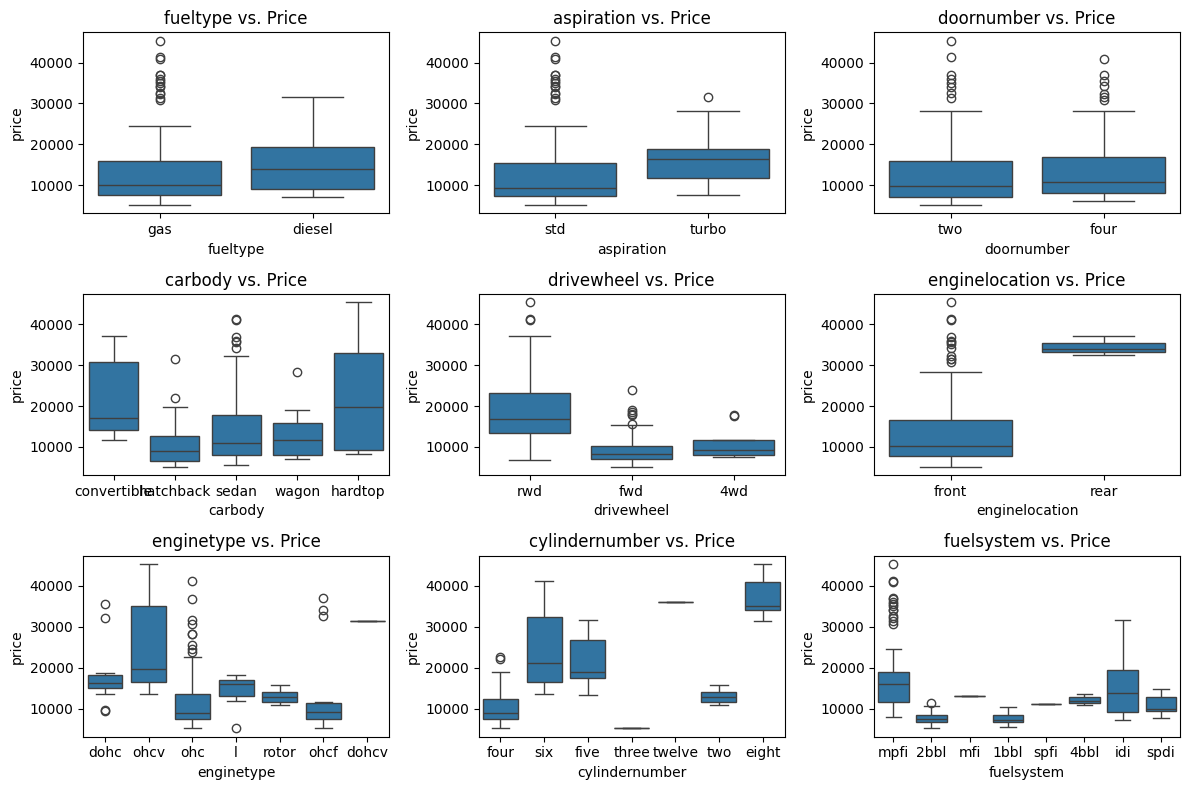

In [19]:
# Box plot of Categorical Feature vs. Price

plt.figure(figsize=(12, 8)) # setting figure size
for feature in categorical_columns:  # looping through categorical column
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price') # seaborn is used to plot boxplot
    plt.title(f'{feature} vs. Price')# title of the graph
plt.tight_layout()
plt.show()

This box plot shows the relation of price with different car attributes.

Observations:


*   Diesel cars have a lower price compared to gasoline cars.And also gasoline cars have wider range of price.
*   Turbocharged cars have higher median price than standard aspiration cars.


*   Four door cars have higher price than two door cars.
*   Hardtop and convertible cars have higherprice and also sedan and hatchbacks have wider range of price.


*   RWD cars have higher price than FWD cars.
*   Rear-engine  cars have higher price than front-engine.

*   Rotary engines have higher price
*   cars with MPFI fuel system have higher price.









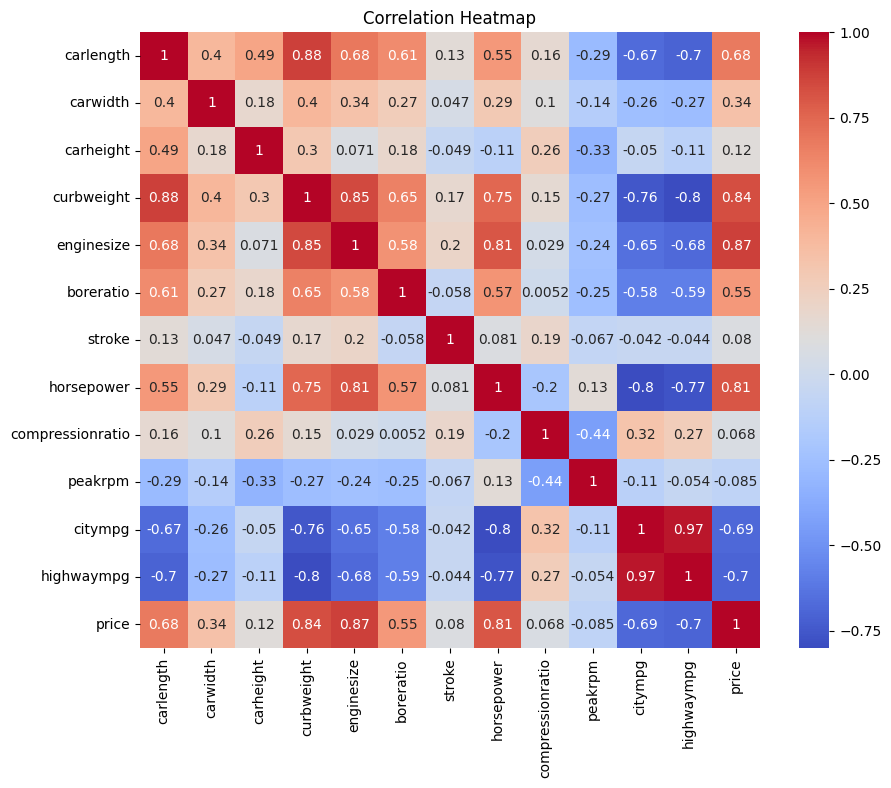

In [20]:
# Heat map for Correlation Analysis

numerical_columns=['carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','horsepower',
                   'compressionratio','peakrpm','citympg','highwaympg','price']
correlation_matrix = df[numerical_columns].corr()# compute correaltion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')# plotting heatmap using seaborn
plt.title('Correlation Heatmap')
plt.show()

Observations from heatmap:

*  The target variable 'price'  is highly correlated with curbweight, enginesize,horsepower and carwidth.
*   price is negatively correlated with 'citympg'and highwaympg.

*   Independent variables like enginesize and curbweight ,enginesize and horsepower are highly correlated with eachother.
*   Also independent variables like curbweight and carlength have a high correlation with eachother.





**DATA PREPROCESSING**

In [21]:
#Extract brand and model from CarName
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['model'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Define categorical and numerical columns
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'model']
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

In [22]:
 # Data encoding using label encoding

label_encoder = LabelEncoder() # initialize label encoder
for column in categorical_columns: # looping through categorical columns
    df[column] = label_encoder.fit_transform(df[column]) # encode its values

In [23]:
df.head() # checking the encoding

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,1,79
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,1,123
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,1,29
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,2,1
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,2,2


In [24]:
#Feature engineering

df['power_to_weight_ratio'] = df['horsepower'] / df['curbweight'] # created a new column in df 'power_to_weight_ratio'for better analysis

for column in numerical_columns:
    df[f'{column}_squared'] = df[column] ** 2     # create  new feature by squaring the  values in numerical column to capturing non linear relationship between features for better performance

df['log_enginesize'] = np.log(df['enginesize'] + 1) # calculated natural logarithm of 'enginesize' column for better performance



In [25]:
# Feature scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns]) #apply feature scaling to numerical columns to standardize the features to same scale

In [26]:
df.head() # checking scaling

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,curbweight_squared,enginesize_squared,boreratio_squared,stroke_squared,compressionratio_squared,horsepower_squared,peakrpm_squared,citympg_squared,highwaympg_squared,log_enginesize
0,1,3,alfa-romero giulia,1,0,1,0,2,0,-1.690772,...,6492304,16900,12.0409,7.1824,81.0,12321,25000000,441,729,4.875197
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,-1.690772,...,6492304,16900,12.0409,7.1824,81.0,12321,25000000,441,729,4.875197
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,-0.708596,...,7969329,23104,7.1824,12.0409,81.0,23716,25000000,361,676,5.030438
3,4,2,audi 100 ls,1,0,0,3,1,0,0.173698,...,5461569,11881,10.1761,11.5600,100.0,10404,30250000,576,900,4.700480
4,5,2,audi 100ls,1,0,0,3,0,0,0.107110,...,7974976,18496,10.1761,11.5600,64.0,13225,30250000,324,484,4.919981


**SPLITTING DATA INTO TRAIN AND TEST**

In [27]:
# Splitting the data
X = df.drop(['price', 'CarName'], axis=1)  # drop columns 'price' and 'carname' and assign  all other features to x.
y = df['price']     # assign 'price' column to y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# splitting the dataset into random  train and test using train_test_split() function.



**MODEL SELECTION AND TRAIN THE MODEL**

**MODEL TRAINING USING LINEAR REGRESSION**

In [28]:
# Model training using linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

**MODEL EVALUATION OF LINEAR REGRESSION MODEL**

In [29]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred) # calculate mean squared error between predicted target value and actual target value
r2_square = r2_score(y_test,y_pred)    # calcualte R squared value
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.8743921699078262
Mean Squared Error: 9915987.161445064


**MODEL TRAINING USING RANDOM FOREST**

In [30]:
# Model training using Random forest

random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42) #Intialize random forest regressor

random_forest_regressor.fit(X_train, y_train)

y_pred = random_forest_regressor.predict(X_test)# make prediction on testing data


**MODEL EVALUATION OF RANDOM FOREST MODEL**

In [31]:
# Evaluate the model using random forest
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("R-squared :", r2)
print("Mean Squared Error (MSE):", mse)



R-squared : 0.9550905373589301
Mean Squared Error (MSE): 3545333.5564308297


OBSERVATIONS


*   Here,I created two models , one using linear regression algorithm and other using random forest algorithm.

*   In the linear regression(model1), R squared is 0.8743921699317792
                               Mean Squared Error: 9915987.159554115

*   In random forest(model2) ,R-squared : 0.9550905373589301
                            Mean Squared Error : 3545333.5564308297


From this metrics it is observed that,

*  Random forest model has high R squared as compared to linear regression which means the second model explains higher proportion of variance in target variable.

*  Also , in the case of MSE , model 2 has lower mse than model1 which indicates that model2 has lower error .


Therefore, in conclusion I can say that model2 perform better than model1. It demonstrates better performance.





